**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>

<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ требований работодателей к вакансии аналитик данных junior/middle на основе информации сервиса hh.ru» </center>

<center>слушателя Барановской Натальи Евгеньевны<br>группы № 047-гз </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Python для анализа данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> Москва, 2024

### Цель исследования:

Цель данного проекта — анализ рынка труда в области аналитики данных на платформе hh.ru, а именно:
- Выявление ключевых компетенций, влияющих на уровень заработной  
платы, предлагаемой работодателями для вакансии «аналитик данных (Python)».
- Определение возрастных ограничений для позиции «junior аналитик данных (Python)».
- Сопоставление спроса и предложения в отношении заработной платы на рынке труда для позиции «аналитик данных (Python)».

В ходе исследования будут рассмотрены следующие вопросы:
1. Какие ключевые компетенции требуются для позиции аналитика данных (Python)?
2. Какое влияние оказывают эти компетенции на предлагаемую работодателями заработную плату?
3. Верно ли утверждение, что чем выше предлагаемая заработная плата, тем больше навыков требуется от кандидата?
4. Существуют ли возрастные ограничения для позиции junior аналитика данных (Python)? Верно ли утверждение, что junior может быть только в возрасте до 25 лет?
6. Как соотносятся спрос и предложение в отношении заработной платы на рынке труда для позиции аналитика данных (Python)?



Цель данного проекта — выявить, какие компетенции влияют на предложение работодателей по заработной плате (верно ли, что, чем выше предлагаемая заработная плата, тем больше навыков требуется); выяснить, верно ли утверждение, что junior может быть только в возрасте до 25 лет; выяснить, соотношение спроса и предложения в зарплатах на рынке руда (hh.ru) для вакансии "аналитик данных".


Для анализа используется набор данных, полученный путем парсинга сайта hh.ru. Датафрейм вакансий состоит из 10 признаков (3 числовых признака, один логический и 6 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>

<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Обзор рынка вакансий на сайте hh.ru</a><br>
<a href=#3>3.  Анализ медианной зарплаты для junior-позиции</a><br>
<a href=#4>4.  Проверка среднего возраста junior-аналитиков по резюме</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#5>6.  Выводы и рекомендации</a><br>
<a href=#6>7.  Список используемой литературы</a><br>


#  <a name="1">1.Предобработка данных</a>

Импорт необходимых библиотек

In [30]:
import numpy as np
import pandas as pd

Парсер вакансий взят из открытого репозитория: https://github.com/hukenovs/hh_research.git
<br>
<br>
Подготовка данных к анализу (очистка данных, трансформация данных, дополнение, оптимизация):
* Данные выгружены в несколько файлов, возможны повторы. Объединить все файлы в один.<br>
* Убрать повторы <br>
* В файлах данных есть пустые строки. Убрать пустые строки <br>
* В файлах есть не относящиеся к запросу вакансии (например, "Middle Frontend-разработчик (React/Vue)"). Удалить лишние вакансии.
* Обработать пропуски при необходимости. <br>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hh_results.csv to hh_results.csv
Saving hh_results_analis.csv to hh_results_analis.csv
Saving hh_results_busines.csv to hh_results_busines.csv
Saving hh_results_sys_an.csv to hh_results_sys_an.csv
Saving hh_results2.csv to hh_results2.csv


### Столбцы данных

<h>Параметр /	Тип	/ Описание </h>
*   Ids	/ str /	идентификатор вакансии (формирует ссылку на вакансию)
*   Employer /	str /	работодатель
*   Name	/	str	/	название вакансии
*   Salary	/	bool	/	указание зарплаты: True / False
*   From	/	float	/	нижний порог зарплаты
*   To	/	float	/	верхний порог зарплаты
*   Experience	/	str	/	опыт работы
*   Schedule	/	str	/	график работы
*   Keys	/	list	/	ключевые навыки
*   Description	/	str	/	описание вакансиии

In [ ]:
df = pd.read_csv('hh_results.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          971 non-null    int64  
 1   Employer     553 non-null    object 
 2   Name         553 non-null    object 
 3   Salary       971 non-null    bool   
 4   From         85 non-null     float64
 5   To           69 non-null     float64
 6   Experience   553 non-null    object 
 7   Schedule     553 non-null    object 
 8   Keys         971 non-null    object 
 9   Description  553 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 69.3+ KB


Объединим все данные в одну таблицу

In [ ]:
df2 = pd.read_csv('hh_results_analis.csv')
df = pd.concat([df, df2], ignore_index=True)
df = pd.concat([df, pd.read_csv('hh_results_busines.csv'), pd.read_csv('hh_results_sys_an.csv'), pd.read_csv('hh_results2.csv')], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          5539 non-null   int64  
 1   Employer     3047 non-null   object 
 2   Name         3047 non-null   object 
 3   Salary       5539 non-null   bool   
 4   From         528 non-null    float64
 5   To           419 non-null    float64
 6   Experience   3047 non-null   object 
 7   Schedule     3047 non-null   object 
 8   Keys         5539 non-null   object 
 9   Description  3047 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 395.0+ KB


Посмотрим количество пустых строк в БД.<br>
Изначально известно, что, если в названии вакансии пусто, то вся строка пустая, поэтому считать будем по NaN в столбце Name

In [ ]:
cnt = (df['Name'].isnull()).sum()
cnt

2492

Как видим, в представленных данных почти половина строк (3455 из 7539) - пустые строки с заполнением только в индексе.<br>
Удалю их, чтобы не мешали.<br>
Для этого буду использовать dropna с обязательным значением thresh (в строке должно быть, хотя-бы, 5 значений, отличных от NaN)

In [ ]:
df = df.dropna (thresh= 5 )


Проверяю на наличие пустых строк

In [ ]:
cnt = (df['Name'].isnull()).sum()
cnt

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, 0 to 5533
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          3047 non-null   int64  
 1   Employer     3047 non-null   object 
 2   Name         3047 non-null   object 
 3   Salary       3047 non-null   bool   
 4   From         528 non-null    float64
 5   To           419 non-null    float64
 6   Experience   3047 non-null   object 
 7   Schedule     3047 non-null   object 
 8   Keys         3047 non-null   object 
 9   Description  3047 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 241.0+ KB


Проверю на наличие NaN в оставшейся таблице

In [ ]:
df.isnull().sum()

Ids               0
Employer          0
Name              0
Salary            0
From           1820
To             1897
Experience        0
Schedule          0
Keys              0
Description       0
dtype: int64

Так как данных немного, удалять вакансии без указания заработной платы не будем - они нужны, чтобы посмотреть на требования к соискателям более полно, но, при расчёте средних зарплат эти вакансии учитываться не будут, т.к. иначе получим не верные данные по средним величинам

Так же, проверю на повторы

In [ ]:
dupl = df[df.duplicated()]
dupl

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
973,96844214,Middle Frontend-разработчик (React/Vue),АгроТаргет,True,100000.0,170000.0,От 1 года до 3 лет,Полный день,"['JavaScript', 'CSS3', 'HTML5', 'CSS', 'HTML',...",Задача – проект по созданию и развитию цифровы...
982,97615359,Junior Data Scientist / Младший аналитик данных,АДВ,False,NaN,NaN,Нет опыта,Полный день,"['Python', 'Математическая статистика', 'Обуче...","АДВ Tech – дивизион, где создаются уникальные ..."
989,97809908,Python разработчик,Аптеки Столички,True,NaN,130500.0,От 1 года до 3 лет,Полный день,"['Linux', 'SQL', 'PostgreSQL']",ГК НЕО-ФАРМ (Аптечная сеть «СТОЛИЧКИ» и «Неофа...
995,98048301,Junior Analyst (Младший Аналитик),OptiTeam,False,NaN,NaN,Нет опыта,Полный день,[],"О нас и о продукте: Мы – команда OptiTeam, кру..."
1001,96116704,Стажер аналитик / разработчик (SQL / Python),КОРУС Консалтинг,False,NaN,NaN,Нет опыта,Гибкий график,"['Python', 'SQL', 'Анализ данных', 'Базы данны...",Департамент аналитических решений (ДАР) открыв...
...,...,...,...,...,...,...,...,...,...,...
5529,92053059,Разработчик на платформе SberIDP,Газпром нефть,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,[],Мы – команда «Газпромнефть – Цифровые решения»...
5530,97040368,Senior Frontend-разработчик в команду Job Board,HeadHunter,True,NaN,391500.0,От 3 до 6 лет,Полный день,"['Frontend', 'JavaScript', 'React', 'Redux', '...",Ищем Frontend разработчика в новую команду для...
5531,93911443,Data Engineer (DWH Arch),ФЛАУВАУ,False,NaN,NaN,От 3 до 6 лет,Удаленная работа,[],"Flowwow - маркетплейс, где продают свои товары..."
5532,92951990,Аналитик данных (антифрод направление),HeadHunter,False,NaN,NaN,От 1 года до 3 лет,Полный день,"['SQL', 'Python']",Всем привет!На связи команда HH.ru.В настоящее...


И удалю их:

In [ ]:
df = df.drop_duplicates ()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 5527
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          2186 non-null   int64  
 1   Employer     2186 non-null   object 
 2   Name         2186 non-null   object 
 3   Salary       2186 non-null   bool   
 4   From         366 non-null    float64
 5   To           289 non-null    float64
 6   Experience   2186 non-null   object 
 7   Schedule     2186 non-null   object 
 8   Keys         2186 non-null   object 
 9   Description  2186 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 172.9+ KB


Сохраню получившуюся таблицу, чтобы, в дальнейшем, использовать её

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 0 to 5527
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          2186 non-null   int64  
 1   Employer     2186 non-null   object 
 2   Name         2186 non-null   object 
 3   Salary       2186 non-null   bool   
 4   From         366 non-null    float64
 5   To           289 non-null    float64
 6   Experience   2186 non-null   object 
 7   Schedule     2186 non-null   object 
 8   Keys         2186 non-null   object 
 9   Description  2186 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 172.9+ KB


In [ ]:
df.to_csv ('final.csv', index=False)

В получившейся таблице посмотрю, все ли вакансии соответствуют запросу. Для этого проверю, есть ли в названии вакансии слово "аналитик"/"анализ" и аналоги на английском - "analyst"/"analysis". Вакансии, где этого слова нет в названии, удалю

In [ ]:
df['Employer'].str.contains('anal|анал', case=False).value_counts()

Employer
True     1452
False     734
Name: count, dtype: int64

Убираю строки, не относящиеся к нужному мне запросу (их 734 из 2186)

In [ ]:
df = df[df['Employer'].str.contains('anal|анал', case=False)==True]
df['Employer'].str.contains('anal|анал', case=False).value_counts()

Employer
True    1452
Name: count, dtype: int64

Сохраню получившийся массив для дальнейших исследований

In [ ]:
df.to_csv ('final_data.csv', index=False)

#  <a name="2"> 2. Обзор рынка вакансий на сайте hh.ru</a>
* Провести анализ количества и структуру вакансий аналитика на сайте hh.ru
* Изучить основные требования к кандидатам
* Сопоставить данные с требованиями с навыками, встречающимися в резюме соискателей


####Анализ количества и структуры вакансий аналитика на сайте hh.ru####

Для визуализации количества и структуры вакансий на сайте hh.ru использую круговую диаграмму с процентным соотношением разных вакансий в общем количестве.
Так как на hh.ru нет стандарта названий вакансий, построить диаграмму не получится, поэтому создам новый столбец, где стандартизирую названия вакансий к следующим спискам:<br>
а) стажировка, junior, middle, senior:<br>
б) бизнес-аналитик, системный аналитик, финансовый аналитик, аналитик данных, прочее<br>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [ ]:
df = pd.read_csv('final_data.csv')

In [31]:
def pos(x):
    if 'junior' in x.lower() or 'младший' in x.lower():
      return "Junior"
    elif 'стажер' in x.lower() or 'стажир' in x.lower():
      return 'Стажировка'
    elif 'senior' in x.lower() or 'старший' in x.lower() or 'ведущий' in x.lower():
      return 'Senior'
    else:
      return 'Middle'

def prof(x):
    if 'бизн' in x.lower() or 'busin' in x.lower():
      return "бизнес-аналитик"
    elif 'системн' in x.lower() or 'system' in x.lower():
      return 'системный аналитик'
    elif 'финанс' in x.lower() or 'fin' in x.lower():
      return 'финансовый аналитик'
    elif 'данн' in x.lower() or 'data' in x.lower():
      return 'аналитик данных'
    else:
      return 'прочее'


df.insert(loc=2, column='Position', value=df.apply(lambda x: pos(x['Employer']), axis=1))
df.insert(loc=3, column='Profession', value=df.apply(lambda x: prof(x['Employer']), axis=1))
df.head(10)

,Ids,Employer,Position,Profession,Name,Salary,From,To,Experience,Schedule,Keys,Description
0,97615359,Junior Data Scientist / Младший аналитик данных,Junior,аналитик данных,АДВ,False,NaN,NaN,Нет опыта,Полный день,"['Python', 'Математическая статистика', 'Обуче...","АДВ Tech – дивизион, где создаются уникальные ..."
1,98048301,Junior Analyst (Младший Аналитик),Junior,прочее,OptiTeam,False,NaN,NaN,Нет опыта,Полный день,[],"О нас и о продукте: Мы – команда OptiTeam, кру..."
2,96116704,Стажер аналитик / разработчик (SQL / Python),Стажировка,прочее,КОРУС Консалтинг,False,NaN,NaN,Нет опыта,Гибкий график,"['Python', 'SQL', 'Анализ данных', 'Базы данны...",Департамент аналитических решений (ДАР) открыв...
3,96174502,Аналитик по маркетплейсам,Middle,прочее,AVON,False,NaN,NaN,От 1 года до 3 лет,Гибкий график,[],Обязанности: ​​​​​​​срочный трудовой договор н...
4,96455829,Analyst,Middle,прочее,MobiAds ex.WAKEAPP,False,NaN,NaN,От 1 года до 3 лет,Полный день,"['SQL', 'Python', 'Анализ данных']",Рекламный холдинг Мобиадс (ex. ВейкАпп) - явля...
5,97981603,Data/Product Analyst (Стажер/Trainee),Стажировка,аналитик данных,Сравни,False,NaN,NaN,Нет опыта,Полный день,[],Приглашаем начинающих продуктовых и дата анали...
6,97239420,Аналитик/Экономист/Middle Researcher,Middle,прочее,СПЕЙС МЕДИА ГРУПП,False,NaN,NaN,От 1 года до 3 лет,Полный день,[],В проектный офис с функцией Think Tank требует...
7,97405949,Data Analyst / Data Scientist (Junior/Junior+),Junior,аналитик данных,Kept (Кэпт),False,NaN,NaN,От 1 года до 3 лет,Полный день,"['Python', 'SQL', 'Математическая статистика',...",Мы в поиске талантливого кандидата на вакансию...
8,97600760,Младший аналитик,Junior,прочее,REMONT.IO,True,50000.0,NaN,Нет опыта,Полный день,"['Аналитическое мышление', 'Аналитика', 'SQL',...","Мы - высокотехнологичная компания, которая мен..."
9,98055182,Аналитик данных,Middle,аналитик данных,ВсеИнструменты.ру,True,NaN,140000.0,От 1 года до 3 лет,Удаленная работа,"['Анализ ценообразования', 'JavaScript', 'HTML...",Обязанности: Формирование отчетности по пока...


Посмотрю процентные соотношения в столбцах Position и Profession и построю круговые диаграммы для наглядности

In [32]:
df['Position'].value_counts()

Position
Middle        1188
Senior         158
Junior          82
Стажировка      24
Name: count, dtype: int64

In [33]:
df_pos = pd.DataFrame(df['Position'].value_counts(normalize=True)).reset_index()
df_pos.columns = ['Position', 'Persent']
df_pos

,Position,Persent
0,Middle,0.818182
1,Senior,0.108815
2,Junior,0.056474
3,Стажировка,0.016529


In [35]:
import plotly.express as px

fig = px.pie(df_pos,
             values='Persent',
             names='Position',
             title='Процентное соотношение структуры вакансий по позициям')

fig.show()

Рис.1. Процентное соотношение структуры вакансий по позициям

In [ ]:
df['Profession'].value_counts()

Profession
прочее                 754
системный аналитик     305
бизнес-аналитик        201
аналитик данных        176
финансовый аналитик     16
Name: count, dtype: int64

In [ ]:
df_prof = pd.DataFrame(df['Profession'].value_counts(normalize=True)).reset_index()
df_prof.columns = ['Profession', 'Persent']
df_prof

,Profession,Persent
0,прочее,0.519284
1,системный аналитик,0.210055
2,бизнес-аналитик,0.138430
3,аналитик данных,0.121212
4,финансовый аналитик,0.011019


In [ ]:
fig1 = px.pie(df_prof,
             values='Persent',
             names='Profession',
             title='Процентное соотношение структуры вакансий по профессии')
fig1.show()

Рис.2. Процентное соотношение структуры вакансий по профессии

####Основные требования к кандидатам####

Требования к кандидатам в столбце Keys. Посчитаю частоту встречаемости каждого признака для позиций "Стажировка", "Junior" и "Middle", т.к. позиции выше нас не интересуют

In [ ]:
df_copy = df[df['Position'] != 'Senior']
df_keys = df_copy['Keys']
df_keys.head()

0    ['Python', 'Математическая статистика', 'Обуче...
1                                                   []
2    ['Python', 'SQL', 'Анализ данных', 'Базы данны...
3                                                   []
4                   ['SQL', 'Python', 'Анализ данных']
Name: Keys, dtype: object

Чтобы не разбивать каждую строку на составляющие в таблице, напишу программу, которая будет брать каждое сочетание слов между запятыми и считать, сколько раз это сочетание уже встречалось.<br> Исключаю из слов знаки кавычек, "[", "]" и слово "MS " (т.к. MS Excel = Excel, MS SQL = SQL и т.д.)

In [ ]:
import re
words = {}

def val(args):
    args = re.sub("['\]\[]", "", args)
    args = re.sub("MS ", "", args)
    args = args.split(',')
    for word in args:
        if words.get(word.lower().strip(), None):
            words[word.lower().strip()] +=1
        else:
            words[word.lower().strip()] = 1
    return words

df_keys.map(lambda x: val(x))

sorted_words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
df_req = pd.DataFrame.from_dict(sorted_words, orient='index').reset_index()
df_req.columns = ['requirement', 'freq']
df_req = df_req.drop(index=0) #убираю первую строку, т.к. в ней был ключ - пустое значение
df_req.head(10)

,requirement,freq
1,sql,406
2,python,174
3,аналитическое мышление,174
4,анализ данных,145
5,аналитика,141
6,бизнес-анализ,123
7,excel,119
8,bpmn,118
9,системный анализ,95
10,uml,87


In [ ]:
fig2 = px.bar(df_req.head(20),
             y='freq',
             x='requirement',
             title='Основные требования к кандидатам')
fig2.show()

Рис.3. Основные требования к кандидатам

####Сопоставление требований работодателей с навыками, встречающимися в резюме соискателей####

Список навыков в удобном виде взяла на сайте hh.ru в базе открытых резюме

In [ ]:
uploaded = files.upload()

Saving nav.txt to nav.txt


In [ ]:
df_nav = pd.read_csv('nav.txt', sep = ",")
df_nav.columns = ['requirement', 'freq']

df_nav.head(20)

,requirement,freq
0,MS PowerPoint,558
1,Ведение переговоров,556
2,MS Excel,532
3,Английский язык,431
4,Работа в команде,398
5,Пользователь ПК,356
6,Грамотная речь,354
7,SQL,303
8,Аналитическое мышление,277
9,MS Word,272


Последовательно смотреть неудобно, предлагаю посмотреть обе таблицы ТОП-20 рядом

In [ ]:
from IPython.display import display_html

df_req_styler = df_req.head(20).style.set_table_attributes("style='display:inline'").set_caption('Запрос работодателей')
df_nav_styler = df_nav.head(20).style.set_table_attributes("style='display:inline'").set_caption('Навыки соискателей')

display_html(df_req_styler._repr_html_() + df_nav_styler._repr_html_(), raw=True)


,requirement,freq
1,sql,406
2,python,174
3,аналитическое мышление,174
4,анализ данных,145
5,аналитика,141
6,бизнес-анализ,123
7,excel,119
8,bpmn,118
9,системный анализ,95
10,uml,87


Как видим, соискатели, как минимум из открытых резюме, мало понимают, какие навыки хотят видеть работодатели в их характеристиках. По сопоставлению видно, что верно указан только SQL, остальное, у большинства соискателей либо отсутствует, либо заменено на менее интересные для работодателей позиции.<br>
При анализе навыков соискателей было выявлено, что люди пишут, порой, самые странные вещи, например: "умение пользоваться ПК" или знание "Outlook". Причем, приведённые два навыка - не самые редкие.<br>
Из данного анализа могу сделать вывод, <br>
1. при поиске работника, бОльшая часть резюме отсеивается из-за неверного выбора навыков;<br>
2. при правильной постановке навыков в резюме можно выделиться среди сотен соискателей

#  <a name="3">3. Анализ медианной зарплаты для junior-позиции</a>

* Сбор данных о зарплатах на позицию junior-аналитика
* Выявление медианного значения зарплат для данной позиции
* Сравнение полученных данных с рыночной статистикой
* Сравнение полученных данных с запросом в резюме соискателей

In [6]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data (1).csv


####Сбор данных о зарплатах на позицию junior и middle- аналитика####

Так как в открытом доступе было очень мало вакансий на junior позицию (см. анализ выше), возьму данные из вакансий с требуемым опытом работы до 2-3 лет (это позиции junior и middle-)

In [7]:
df = pd.read_csv('final_data.csv')

In [8]:
df_sal = df[df['Experience'].str.contains('Нет опыта|От 1 года до 3 лет', case=False)==True]
df_sal = df_sal[df_sal.Salary == True]
df_sal.head(10)

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
8,97600760,Младший аналитик,REMONT.IO,True,50000.0,NaN,Нет опыта,Полный день,"['Аналитическое мышление', 'Аналитика', 'SQL',...","Мы - высокотехнологичная компания, которая мен..."
9,98055182,Аналитик данных,ВсеИнструменты.ру,True,NaN,140000.0,От 1 года до 3 лет,Удаленная работа,"['Анализ ценообразования', 'JavaScript', 'HTML...",Обязанности: Формирование отчетности по пока...
10,97506701,Младший аналитик (IT),Olima,True,100000.0,140000.0,Нет опыта,Полный день,"['Анализ данных', 'SQL', 'Разработка техническ...",Мы – IT кадровое агентство. Трудоустраиваем ка...
13,82742802,Лингвист-аналитик,"Megaputer Intelligence, Компания",True,95000.0,NaN,От 1 года до 3 лет,Полный день,[],"Российская компания Megaputer Intelligence, од..."
17,97422985,Аналитик-исследователь / Researcher,Proscom,True,60000.0,100000.0,От 1 года до 3 лет,Удаленная работа,"['Английский язык', 'Аналитические исследовани...",Мы ищем аналитика в команду аналитического цен...
20,97440185,"Аналитик маркетплейсов, удаленно",Евро Трейд,True,100000.0,100000.0,От 1 года до 3 лет,Полный день,"['Финансовое планирование', 'Экономический ана...",Наша компания- лидер в своем сегменте сложных ...
21,96505706,Аналитик,Общественная палата РФ,True,70000.0,70000.0,Нет опыта,Полный день,"['Аналитические исследования', 'Статистический...",Обязанности: Аналитическое сопровождение пров...
25,97304327,Аналитик данных,Froza,True,100000.0,150000.0,От 1 года до 3 лет,Полный день,[],Froza.ru — динамично развивающийся маркетплейс...
27,98014014,Разработчик/аналитик Python/SQL,Digital Strategy,True,100000.0,NaN,От 1 года до 3 лет,Удаленная работа,"['Google Analytics', 'Data Analysis', 'MS Powe...",Digital Strategy – “бутиковое” агентство perfo...
29,97929624,Аналитик данных,ГКУ Центр занятости населения города Москвы,True,150000.0,NaN,От 1 года до 3 лет,Полный день,[],Один из ключевых партнёров Центра занятости на...


In [9]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 8 to 1429
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ids          224 non-null    int64  
 1   Employer     224 non-null    object 
 2   Name         224 non-null    object 
 3   Salary       224 non-null    bool   
 4   From         180 non-null    float64
 5   To           120 non-null    float64
 6   Experience   224 non-null    object 
 7   Schedule     224 non-null    object 
 8   Keys         224 non-null    object 
 9   Description  224 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 17.7+ KB


В таблице есть часть вакансий с зарплатами "от" и "до", часть только "от", часть только "до".<br>
Создам новый столбец, в который положу зарплату по следующему принципу:<br>
- если есть оба числа, положу среднее
- если есть только "от", положу его (нижний порог)
- если есть только "до", положу это число минус 15% (т.к. работодатель редко готов платить полную зарплату, указанную в верхнем пороге)

In [10]:
df_sal['From'] = df_sal['From'].fillna(0)
df_sal['To'] = df_sal['To'].fillna(0)

In [11]:
def sal(sal_from, sal_to):
    mean = 0
    if sal_from < 1:
        mean = sal_to*0.85
    elif sal_to < 1:
        mean = sal_from
    else:
        mean = (sal_from + sal_to)/2
    return mean

df_sal.insert(loc=6, column='Mean_Sal', value=df_sal.apply(lambda x: sal(x['From'], x['To']), axis=1))

df_sal.head(10)

,Ids,Employer,Name,Salary,From,To,Mean_Sal,Experience,Schedule,Keys,Description
8,97600760,Младший аналитик,REMONT.IO,True,50000.0,0.0,50000.0,Нет опыта,Полный день,"['Аналитическое мышление', 'Аналитика', 'SQL',...","Мы - высокотехнологичная компания, которая мен..."
9,98055182,Аналитик данных,ВсеИнструменты.ру,True,0.0,140000.0,119000.0,От 1 года до 3 лет,Удаленная работа,"['Анализ ценообразования', 'JavaScript', 'HTML...",Обязанности: Формирование отчетности по пока...
10,97506701,Младший аналитик (IT),Olima,True,100000.0,140000.0,120000.0,Нет опыта,Полный день,"['Анализ данных', 'SQL', 'Разработка техническ...",Мы – IT кадровое агентство. Трудоустраиваем ка...
13,82742802,Лингвист-аналитик,"Megaputer Intelligence, Компания",True,95000.0,0.0,95000.0,От 1 года до 3 лет,Полный день,[],"Российская компания Megaputer Intelligence, од..."
17,97422985,Аналитик-исследователь / Researcher,Proscom,True,60000.0,100000.0,80000.0,От 1 года до 3 лет,Удаленная работа,"['Английский язык', 'Аналитические исследовани...",Мы ищем аналитика в команду аналитического цен...
20,97440185,"Аналитик маркетплейсов, удаленно",Евро Трейд,True,100000.0,100000.0,100000.0,От 1 года до 3 лет,Полный день,"['Финансовое планирование', 'Экономический ана...",Наша компания- лидер в своем сегменте сложных ...
21,96505706,Аналитик,Общественная палата РФ,True,70000.0,70000.0,70000.0,Нет опыта,Полный день,"['Аналитические исследования', 'Статистический...",Обязанности: Аналитическое сопровождение пров...
25,97304327,Аналитик данных,Froza,True,100000.0,150000.0,125000.0,От 1 года до 3 лет,Полный день,[],Froza.ru — динамично развивающийся маркетплейс...
27,98014014,Разработчик/аналитик Python/SQL,Digital Strategy,True,100000.0,0.0,100000.0,От 1 года до 3 лет,Удаленная работа,"['Google Analytics', 'Data Analysis', 'MS Powe...",Digital Strategy – “бутиковое” агентство perfo...
29,97929624,Аналитик данных,ГКУ Центр занятости населения города Москвы,True,150000.0,0.0,150000.0,От 1 года до 3 лет,Полный день,[],Один из ключевых партнёров Центра занятости на...


####Выявление медианного значения зарплат для данной позиции####

Для начала посмотрю, нет ли выбивающихся из общего массива данных. Для этого посмотрю минимум и максимум из всех значений зарплат

In [3]:
import matplotlib.pyplot as plt

In [ ]:
print('Минимальное значение: ', df_sal['Mean_Sal'].min())
print('Максимальное значение: ', df_sal['Mean_Sal'].max())

Минимальное значение:  18487.5
Максимальное значение:  385000.0


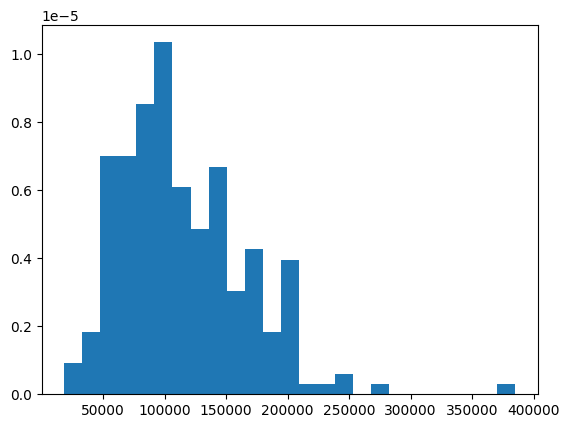

In [ ]:
plt.hist(df_sal['Mean_Sal'], bins=25, density=True)

plt.show()

Рис.4. Гистограмма распределения заработных плат по вакансиям без очистки от анамалий

На гистограмме видно, что минимальное значение вполне возможно, а вот максимальное (более 250 тысяч) - уже аномалия. Срежу значения, выше 250 тысяч, и построю график распределения, а так же, посчитаю среднее медианное значение

In [ ]:
df_sal = df_sal[df_sal.Mean_Sal <= 250000]
print('Среднее медианное значение:', df_sal['Mean_Sal'].median())

Среднее медианное значение: 103530.0


<Axes: ylabel='Density'>

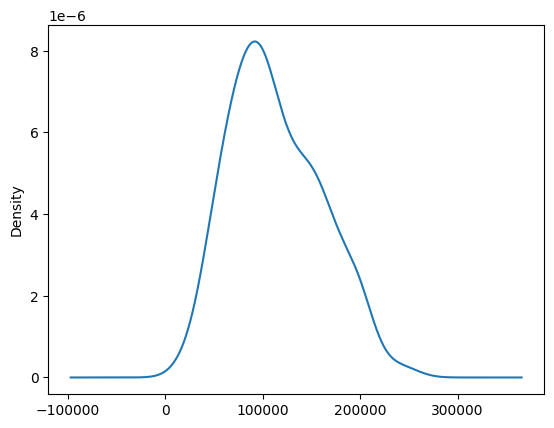

In [ ]:
df_sal['Mean_Sal'].plot(kind='kde')

Рис.5. Диаграмма нормального распределения заработных плат в вакансиях

Действительно, как видно из графика, наиболее часто предлагают заработную плату в районе 100 000 рублей (медиана - 103 530 рублей)

####Сравнение полученных данных с рыночной статистикой####

"По данным ГородРабот.ру, средняя зарплата Аналитика в Москве за период с января по апрель 2024 год ‒ 127 390 рублей. В апреле относительно марта заработная плата изменилась на 2.1% ‒ с 130 164 до 127 390 рублей.<br> А чаще всего в вакансиях встречается зарплата 100 000 рублей (модальная)." <br> <br>
Вывод: полученный в ходе моего исследования результат полностью соответствует рыночной тенденции - модальная редняя равна 103 530 при рыночной модальной средней в 100 000.

####Сравнение полученных данных с запросом в резюме соискателей####

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sal_res.txt to sal_res.txt


In [5]:
df_sal_res = pd.read_csv('sal_res.txt')

df_sal_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    2456 non-null   object
 1   Age         2456 non-null   int64 
 2   Experience  1810 non-null   object
 3   Salary_Rub  2456 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 76.9+ KB


Преобразую значения в колонке Salary в int

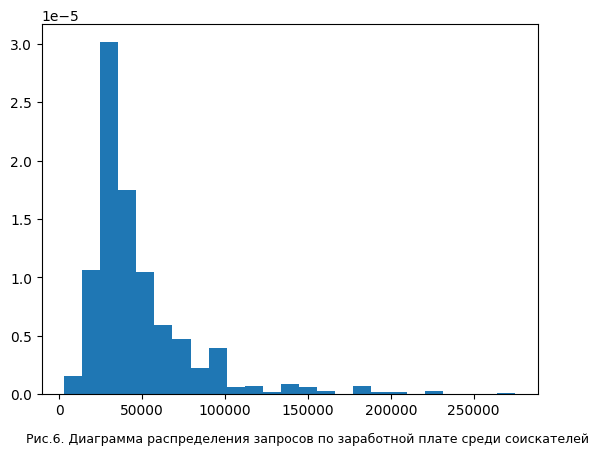

In [12]:
plt.hist(df_sal_res['Salary_Rub'], bins=25, density=True)
plt.figtext(0.98, 0.01, "Рис.6. Диаграмма распределения запросов по заработной плате среди соискателей", ha='right', fontsize=9)

plt.show()

In [ ]:
print('Среднее медианное значение:', df_sal_res['Salary_Rub'].median())

Среднее медианное значение: 40000.0


Из выборки в 2 450 резюме видим, что средний запрос по оплате труда у специалистов с опытом работы от 0 до 2 лет - 40 000 рублей. Это более чем в два раза меньше, чем в вакансиях<br>
Из графика видно, что большая часть соискателей ставит в резюме заработную плату ниже 100 000. <br>
Из данных можно сделать следующие выводы:
- соискатели без опыта работы боятся указывать высокую оплату труда в резюме
- из-за большого количества "дешевых" работников, динамика роста заработных плат на молодых специалистов отрицательна
- при правильном составлении резюме и тщательной подготовке к собеседованию, можно получить заработную плату по среднему показателю на рынке вакансий или выше

#  <a name="4"> 4. Проверка среднего возраста junior-аналитиков по резюме </a>

*   Анализ возрастных данных кандидатов на позицию junior аналитик
*   Определение среднего возраста кандидатов
* Сравнение с общими статистическими данными о возрастах в данной нише

####Анализ возрастных данных кандидатов на позицию junior аналитик####

Значения с hh.ru взяты уже в виде удобной таблицы.<br> Взяла только резюме с опытом работы от 0 до 2 лет.

In [6]:
df_sal_res.head(10)

,Position,Age,Experience,Salary_Rub
0,Analyst,30,8 месяцев,60000
1,Analyst,28,5 месяцев,40000
2,Analyst,29,8 месяцев,100000
3,Analyst,30,NaN,30000
4,Analyst,38,2 года,45000
5,Аналитик,25,2 года,180000
6,аналитик,34,NaN,20000
7,аналитик,37,1 год 4 месяца,25000
8,аналитик,38,2 года 1 месяц,30000
9,Аналитик,29,2 года 4 месяца,140000


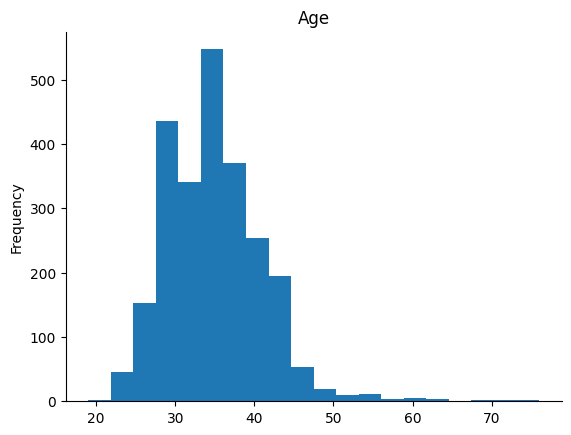

In [8]:
# @title age

from matplotlib import pyplot as plt
df_sal_res['Age'].plot(kind='hist', bins=20, title='Распределение возраста соискателей')
plt.gca().spines[['top', 'right',]].set_visible(False)


Рис.7. Диаграмма распределения возраста среди соискателей

####Определение среднего возраста кандидатов####

In [ ]:
print('Среднее медианное значение возраста соискателя:', df_sal_res['Age'].median())

Среднее медианное значение возраста соискателя: 35.0


Из гистограммы хорошо видно, что средний возраст соискателя колеблется в районе 35-40 лет. Есть анкеты людей старше 50.<br> Такое распределение, по моему мнению, связано с глобальным перестроением рынка занятости - люди, посвятившие 10-15 лет малооплачиваемой работе, увидели возможности и решили переобучиться.<br>
Так же, как мне кажется, такой скос происходит из-за меньшей популярности профессии "Аналитик" среди более молодых людей - на данный момент, существует большое разнообразие высокооплачиваемых профессий с лёгким входом, но требующих большого количества энергии, которых нет у более взрослого населения.<br>
Следует заметить, что по отчёту росстата на 2022 год, наибольший процент населения России находится именно в возрасте 35-60 лет

####Сравнение с общими статистическими данными о возрастах####

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mos_ages.txt to mos_ages.txt


Для сравнения моих выводов с общими статистическими данными, взяла таблицу с поло-возрастным распределением населения Москвы

In [3]:
df_sal_res = pd.read_csv('mos_ages.txt')

df_sal_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Возраст  17 non-null     object
 1   Мужчины  17 non-null     int64 
 2   Женщины  17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 536.0+ bytes


In [25]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import numpy as np
 import seaborn as sns

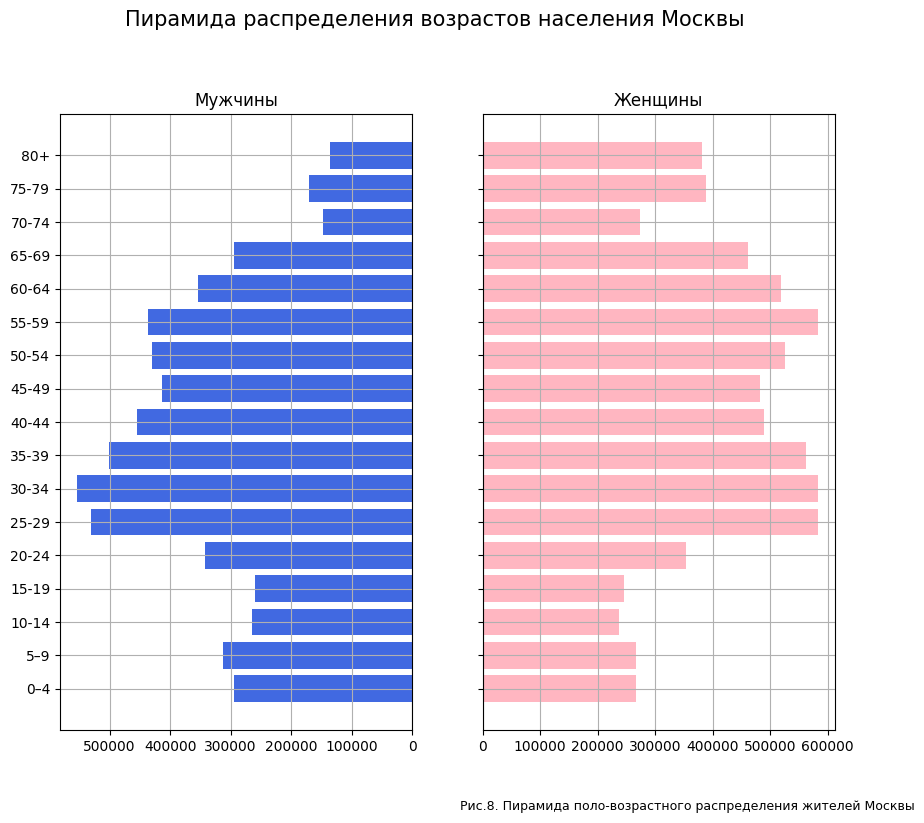

In [23]:
#Строим пирамиду распределения возрастов по полу в Москве
y = range(0, len(df_sal_res))
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))

fig.patch.set_facecolor('xkcd:white')

plt.figtext(0.5,0.99,"Пирамида распределения возрастов населения Москвы", fontsize=15, ha='center')

axes[0].barh(y, df_sal_res['Мужчины'], align='center', color='royalblue')
axes[0].set(title='Мужчины')
axes[1].barh(y, df_sal_res['Женщины'], align='center', color='lightpink')
axes[1].set(title='Женщины')

axes[1].grid() #делаем сетку для женщин
axes[0].set(yticks=y, yticklabels=df_sal_res['Возраст'])
axes[0].invert_xaxis() #отобразили график мужчин относительно нуля Х
axes[0].grid() #делаем сетку для мужчин

plt.figtext(0.98, 0.01, "Рис.8. Пирамида поло-возрастного распределения жителей Москвы", ha='right', fontsize=9)

plt.show()

Как видим из пирамиды, в Москве присутствует глобальная нехватка людей в возрасте 20-25 лет. Возможно, это связано с оттоком из-за СВО.<br>
С другой стороны, преобладает население в возрасте 25-39 лет и старше, это говорит о том, что большинство соискателей будут именно в этом возрасте

#  <a name="5">5. Проверка гипотез </a>


* H0: Чем выше предлагаемая заработная плата, тем больше навыков требуется



####Проверка гипотезы №1: Чем выше предлагаемая заработная плата, тем больше навыков требуется####

In [12]:
df_sal.head(10)

,Ids,Employer,Name,Salary,From,To,Mean_Sal,Experience,Schedule,Keys,Description
8,97600760,Младший аналитик,REMONT.IO,True,50000.0,0.0,50000.0,Нет опыта,Полный день,"['Аналитическое мышление', 'Аналитика', 'SQL',...","Мы - высокотехнологичная компания, которая мен..."
9,98055182,Аналитик данных,ВсеИнструменты.ру,True,0.0,140000.0,119000.0,От 1 года до 3 лет,Удаленная работа,"['Анализ ценообразования', 'JavaScript', 'HTML...",Обязанности: Формирование отчетности по пока...
10,97506701,Младший аналитик (IT),Olima,True,100000.0,140000.0,120000.0,Нет опыта,Полный день,"['Анализ данных', 'SQL', 'Разработка техническ...",Мы – IT кадровое агентство. Трудоустраиваем ка...
13,82742802,Лингвист-аналитик,"Megaputer Intelligence, Компания",True,95000.0,0.0,95000.0,От 1 года до 3 лет,Полный день,[],"Российская компания Megaputer Intelligence, од..."
17,97422985,Аналитик-исследователь / Researcher,Proscom,True,60000.0,100000.0,80000.0,От 1 года до 3 лет,Удаленная работа,"['Английский язык', 'Аналитические исследовани...",Мы ищем аналитика в команду аналитического цен...
20,97440185,"Аналитик маркетплейсов, удаленно",Евро Трейд,True,100000.0,100000.0,100000.0,От 1 года до 3 лет,Полный день,"['Финансовое планирование', 'Экономический ана...",Наша компания- лидер в своем сегменте сложных ...
21,96505706,Аналитик,Общественная палата РФ,True,70000.0,70000.0,70000.0,Нет опыта,Полный день,"['Аналитические исследования', 'Статистический...",Обязанности: Аналитическое сопровождение пров...
25,97304327,Аналитик данных,Froza,True,100000.0,150000.0,125000.0,От 1 года до 3 лет,Полный день,[],Froza.ru — динамично развивающийся маркетплейс...
27,98014014,Разработчик/аналитик Python/SQL,Digital Strategy,True,100000.0,0.0,100000.0,От 1 года до 3 лет,Удаленная работа,"['Google Analytics', 'Data Analysis', 'MS Powe...",Digital Strategy – “бутиковое” агентство perfo...
29,97929624,Аналитик данных,ГКУ Центр занятости населения города Москвы,True,150000.0,0.0,150000.0,От 1 года до 3 лет,Полный день,[],Один из ключевых партнёров Центра занятости на...


Для проверки гипотезы добавлю в начальную таблицу с общими данными новый столбец с количеством требований. Это позволит выразить оба неизвестных в цифрах

In [23]:
df_sal.drop('Keys_qtty', axis=1, inplace=True)
def qtty(arg):
    if arg == "[]":
        return 0
    else:
        return arg.count(',')+1

df_sal.insert(loc=10, column='Keys_qtty', value=df_sal.apply(lambda x: qtty(x['Keys']), axis=1))
df_sal.head(10)

,Ids,Employer,Name,Salary,From,To,Mean_Sal,Experience,Schedule,Keys,Keys_qtty,Description
8,97600760,Младший аналитик,REMONT.IO,True,50000.0,0.0,50000.0,Нет опыта,Полный день,"['Аналитическое мышление', 'Аналитика', 'SQL',...",5,"Мы - высокотехнологичная компания, которая мен..."
9,98055182,Аналитик данных,ВсеИнструменты.ру,True,0.0,140000.0,119000.0,От 1 года до 3 лет,Удаленная работа,"['Анализ ценообразования', 'JavaScript', 'HTML...",4,Обязанности: Формирование отчетности по пока...
10,97506701,Младший аналитик (IT),Olima,True,100000.0,140000.0,120000.0,Нет опыта,Полный день,"['Анализ данных', 'SQL', 'Разработка техническ...",10,Мы – IT кадровое агентство. Трудоустраиваем ка...
13,82742802,Лингвист-аналитик,"Megaputer Intelligence, Компания",True,95000.0,0.0,95000.0,От 1 года до 3 лет,Полный день,[],0,"Российская компания Megaputer Intelligence, од..."
17,97422985,Аналитик-исследователь / Researcher,Proscom,True,60000.0,100000.0,80000.0,От 1 года до 3 лет,Удаленная работа,"['Английский язык', 'Аналитические исследовани...",4,Мы ищем аналитика в команду аналитического цен...
20,97440185,"Аналитик маркетплейсов, удаленно",Евро Трейд,True,100000.0,100000.0,100000.0,От 1 года до 3 лет,Полный день,"['Финансовое планирование', 'Экономический ана...",12,Наша компания- лидер в своем сегменте сложных ...
21,96505706,Аналитик,Общественная палата РФ,True,70000.0,70000.0,70000.0,Нет опыта,Полный день,"['Аналитические исследования', 'Статистический...",6,Обязанности: Аналитическое сопровождение пров...
25,97304327,Аналитик данных,Froza,True,100000.0,150000.0,125000.0,От 1 года до 3 лет,Полный день,[],0,Froza.ru — динамично развивающийся маркетплейс...
27,98014014,Разработчик/аналитик Python/SQL,Digital Strategy,True,100000.0,0.0,100000.0,От 1 года до 3 лет,Удаленная работа,"['Google Analytics', 'Data Analysis', 'MS Powe...",11,Digital Strategy – “бутиковое” агентство perfo...
29,97929624,Аналитик данных,ГКУ Центр занятости населения города Москвы,True,150000.0,0.0,150000.0,От 1 года до 3 лет,Полный день,[],0,Один из ключевых партнёров Центра занятости на...


Посмотрим корреляцию заработной платы (Mean_Sal) к количеству требуемых навыков (Keys_qtty) на графике распределения (точечной диаграмме)

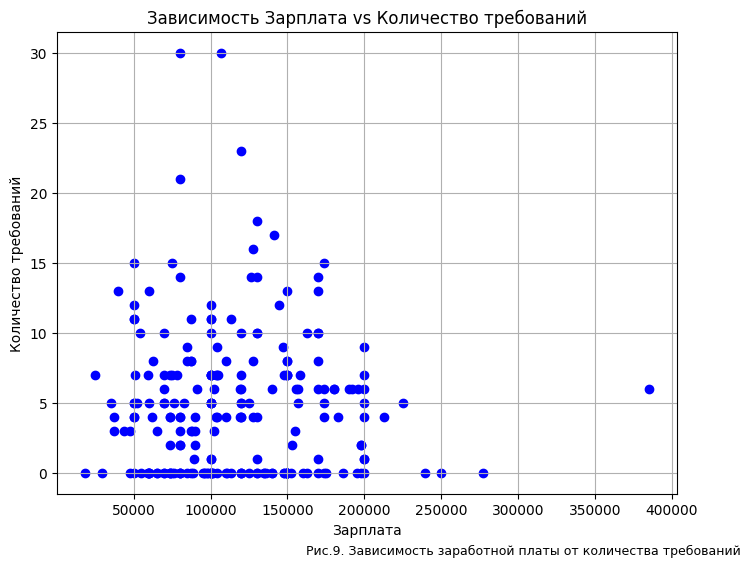

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df_sal['Mean_Sal'], df_sal['Keys_qtty'], color='b', marker='o')
plt.title('Зависимость Зарплата vs Количество требований')
plt.xlabel('Зарплата')
plt.ylabel('Количество требований')
plt.grid(True)
plt.figtext(0.98, 0.01, "Рис.9. Зависимость заработной платы от количества требований", ha='right', fontsize=9)
plt.show()

Как видно из диаграммы, зависимость не прослеживается, однако, предлагаю убедиться в этом более точно, применив формулу корреляции Пирсона: <br>
r = n ∑ i = 1 (x n − ¯ x) (y n − ¯ y) n σ x σ y<br>

Где:<br>

( r ) - коэффициент корреляции Пирсона,<br>
( n ) - количество наблюдений,<br>
( X ) - значения переменной "зарплата",<br>
( Y ) - значения переменной "требования к кандидату".

In [29]:
from scipy.stats.stats import pearsonr

pearsonr(df_sal['Mean_Sal'], df_sal['Keys_qtty'])

<ipython-input-29-269089536179>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.033655807662880136, pvalue=0.6163444951594313)

Коэффициент корреляции – -0,0336, а двустороннее значение p – 0,616<br>
Поскольку значение p больше 0,05, мы можем заключить, что статистически значимой корреляции между заработной платой и количеством требований к кандидатам нет

# <a name="6">6. Выводы</a>


*   Сводка основных результатов исследования
*   Предложения по эффективному поиску работы
- Заключение


####Сводка основных результатов исследования####

1. Соискатели, как минимум из открытых резюме, мало понимают, какие навыки хотят видеть работодатели в их характеристиках. При правильной постановке навыков в резюме можно выделиться среди сотен соискателей <br>
2. Средняя модальная заработная плата в вакансиях - 103 тысячи рублей. При правильном составлении резюме и тщательной подготовке к собеседованию, можно получить заработную плату по среднему показателю на рынке вакансий или выше<br>
3. Средний медианный возраст соискателя на junior-позицию колеблется в районе 35-40 лет. Взрослым соискателям не нужно бояться своего возраста при размещении своего резюме<br>
4. Статистически значимой корреляции между заработной платой и количеством требований к кандидатам нет. Поэтому, при должном упорстве, можно найти вакансию с достойной оплатой труда, даже с минимальными навыками

####Предложения по эффективному поиску работы####

Для эффективного поиска работы предлагаю перейти в подглаву "Основные требования к кандидатам" и проработать ТОП-10 программ/навыков, указать их в своём резюме.<br>
Так же, предлагаю тщательно проработать своё резюме, чтобы выделяться на фоне других соискателей. Возможно, для этого стоит пройти консультацию в ЦЗ или у ментора на выбранном направлении аналитики.

####Заключение####

В качестве заключения хотела бы привести цитату из статьи на Дзен: "Ученые из Сиэтла, которые с 1956 года каждые 7 лет тестировали 6000 человек. Выяснилось, что в 40–50 лет когнитивные способности у людей выше, чем в 20 лет. То есть, на самом деле, в зрелом возрасте учиться легче, чем в юности. И этому есть вполне научное обоснование. Дело в том, что с годами нервная система синтезирует миелин (вещество, изолирующее нервные волокна и обеспечивающее проведение нервных импульсов) эффективнее, чем в молодости. К тому же, зрелый мозг менее восприимчив к дофамину, который в числе прочего отвечает за эмоциональный фон человека. Благодаря этому люди средних лет ведут себя более рационально, а эмоции меньше влияют на их решения."<br>
Ссылка на статью: https://dzen.ru/a/Y8-ebCUz8TofrJl1

# <a name="7"><center>7. Список литературы</center></a>


**Нормативные правовые акты:**
1.	Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

**Учебники и учебные пособия:**
1.	Андерсон. К., Аналитическая культура: от сбора данных до бизнес-результатов. - Москва : Манн, Иванов и Фербер, 2017.
2.	Нисчал Н., Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.
3.	Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2021.
4.	Пасхавер Б., Pandas в действии. — СПб.: Питер, 2023.
5.	Плас Дж. Вандер., Python для сложных задач: наука о данных — СПб.: Питер, 2024.
6.	Уилке К., Основы визуализации данных. Пособие по эффективной и убедительной подаче информации.— М.: Эксмо, 2024.

**Электронные ресурсы:**
1.	PEP 8 – руководство по стилю для кода Python [Электронный ресурс]: URL: https://peps.python.org/pep-0008/ ((дата обращения: 05.04.2024).
2.	Сайт Python Academy [Электронный ресурс]: URL: https://www.python-academy.com/ (дата обращения: 05.04.2024).

